# Algerian Forest Fires Dataset Project EDA Part

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [32]:
dataset= pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header =1)

In [33]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [35]:
df = dataset

In [36]:
# Columns which has null values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [37]:
df = df.dropna()


In [38]:
df = df.fillna(0)


In [39]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [40]:
df['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [41]:
# Columns which has null values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [42]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [43]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [44]:
df = df.drop(122).reset_index(drop = True)

KeyError: '[122] not found in axis'

In [45]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [46]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [47]:
# Spaces were fixed in the column names
df.columns = df.columns.str.strip()
df.columns 

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [48]:
print(df['day'].unique())


['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31' 'day']


In [50]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].apply(pd.to_numeric, errors='coerce')
rows_with_non_numeric = df[df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].isnull().any(axis=1)]


In [52]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].apply(pd.to_numeric, errors='coerce')
rows_with_non_numeric = df[df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].isnull().any(axis=1)]


In [53]:
df = df.drop(rows_with_non_numeric.index)


In [54]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].fillna(-1)


In [55]:
df[[ 'day','month', 'year', 'Temperature','RH', 'Ws']] = df[[ 'day','month', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [56]:
df['month'].shape

(243,)

In [57]:
df['month'].unique()

array([6, 7, 8, 9])

In [58]:
df['year'].unique()

array([2012])

In [59]:
df['Temperature'].shape

(243,)

In [60]:
df['Temperature'].unique()

array([29, 26, 25, 27, 31, 33, 30, 28, 32, 34, 35, 36, 37, 22, 24, 38, 39,
       40, 42])

In [61]:
df['RH'].shape

(243,)

In [62]:
df['RH'].unique()

array([57, 61, 82, 89, 77, 67, 54, 73, 88, 79, 65, 81, 84, 78, 80, 55, 62,
       66, 64, 53, 47, 50, 68, 75, 76, 63, 69, 70, 59, 48, 45, 60, 51, 52,
       58, 86, 74, 71, 49, 44, 41, 42, 90, 87, 72, 46, 37, 36, 56, 43, 83,
       29, 34, 33, 35, 39, 31, 21, 40, 24, 38, 26])

In [63]:
df['Ws'].shape

(243,)

In [64]:
df['Ws'].unique()

array([18, 13, 22, 16, 14, 15, 12, 19, 21, 20, 17, 26, 11, 10,  9,  8,  6,
       29])

In [65]:
objects = [feature for feature  in df.columns if df[feature].dtype == 'O']
for i in objects:
    if i != 'Classes':
        df[i] =  df[i].astype(float)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 23.7+ KB


In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [68]:
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [69]:
df.Classes = df.Classes.str.split()

In [70]:
df.Classes.value_counts()

[fire]         137
[not, fire]    106
Name: Classes, dtype: int64

In [71]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,"[not, fire]",1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,"[not, fire]",1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,"[not, fire]",1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,"[not, fire]",1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,"[not, fire]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,"[not, fire]",1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,[fire],1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,"[not, fire]",1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,"[not, fire]",1


In [72]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,"[not, fire]",2
125,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,"[not, fire]",2
126,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,"[not, fire]",2
127,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,"[not, fire]",2
128,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,"[not, fire]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,[fire],2
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,"[not, fire]",2
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,"[not, fire]",2
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,"[not, fire]",2


In [73]:
df.to_csv('Algerian_forest_fires_dataset_CLEANED.csv', index=False)

In [74]:
df1 = df.drop(['day' , 'month' , 'year' ], axis =1 )

In [75]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)

In [76]:
df1.Classes.value_counts()

1    243
Name: Classes, dtype: int64

In [77]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1


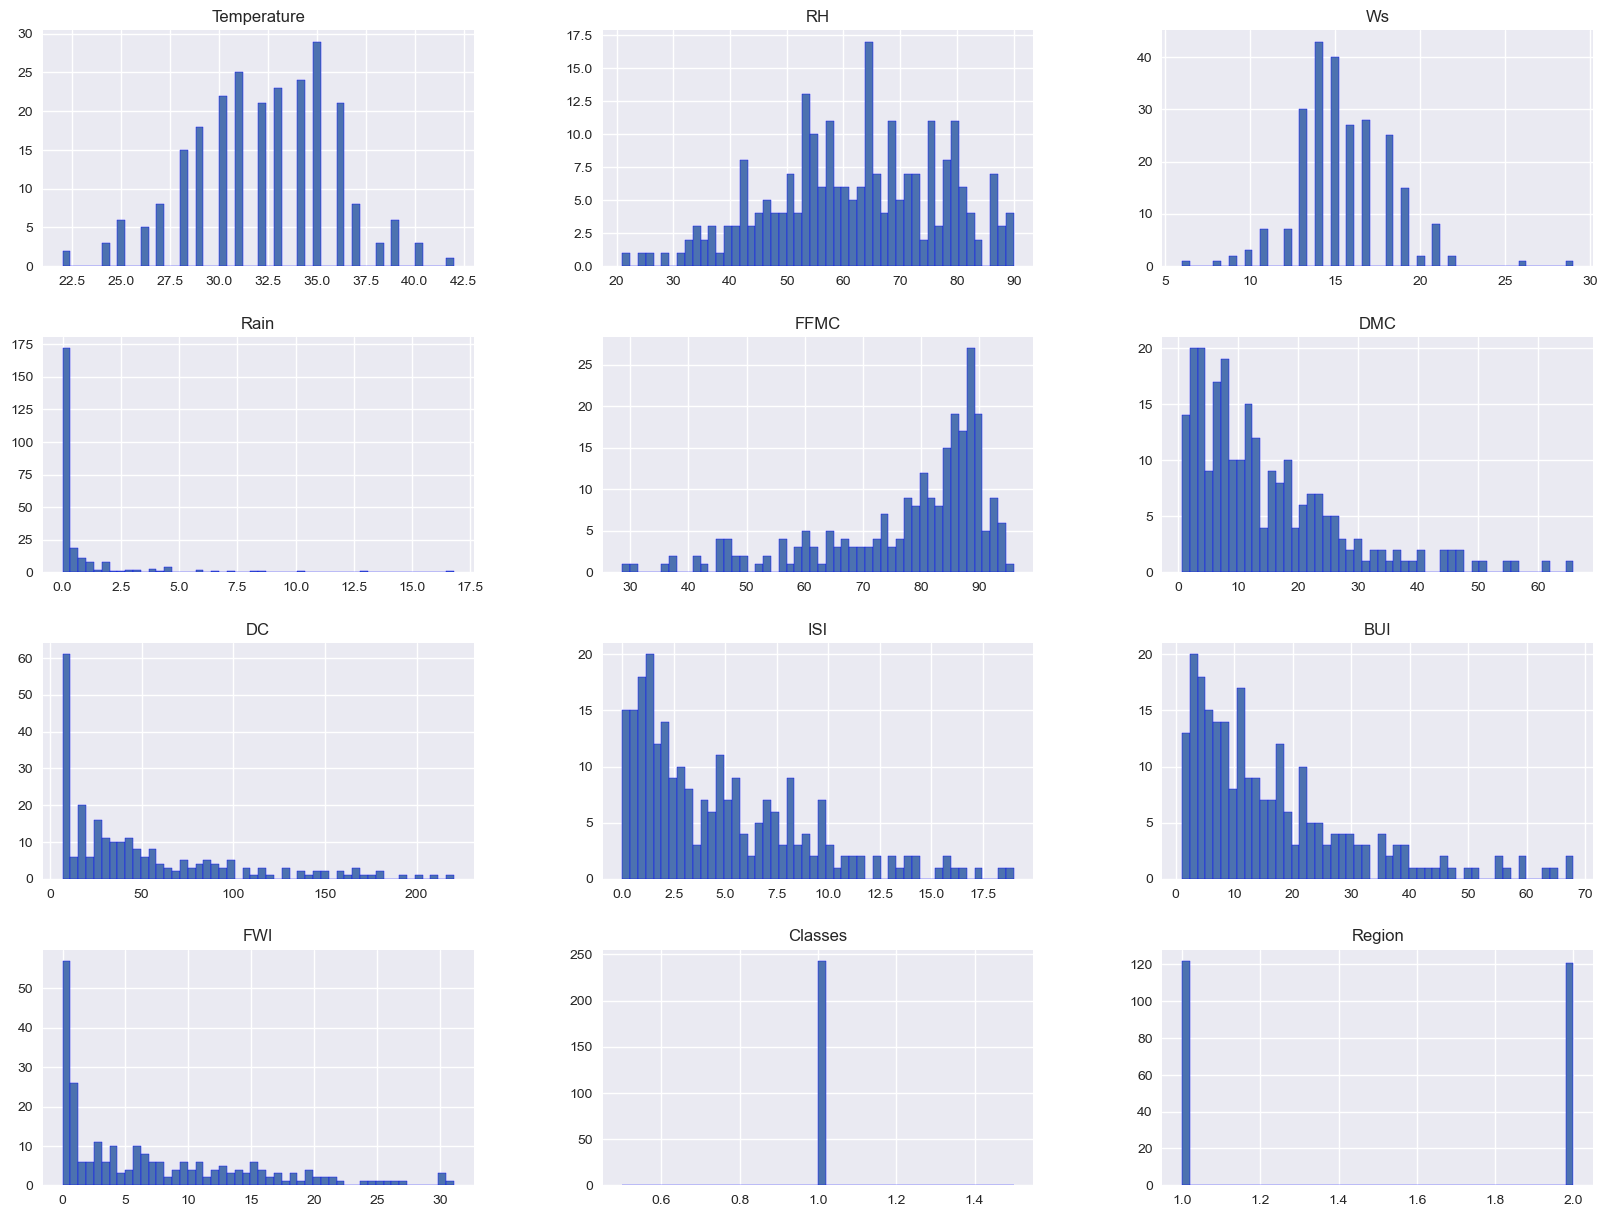

In [78]:
# PLot density plot for all features
plt.style.use('seaborn')
df1.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

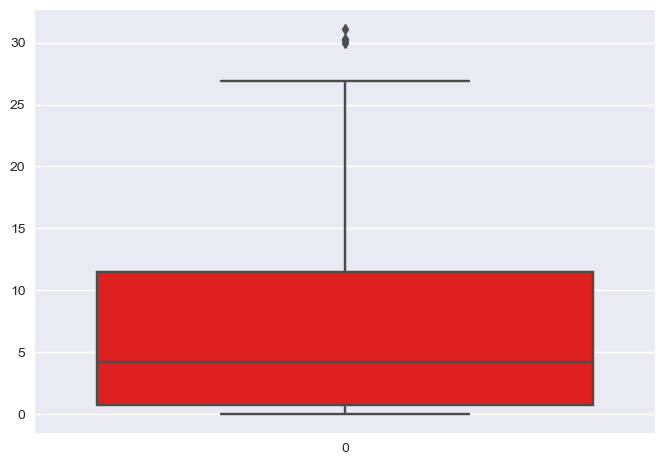

In [79]:
#Boxplot
ax = sns.boxplot(df['FWI'], color= 'red')

In [80]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature =  df1.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

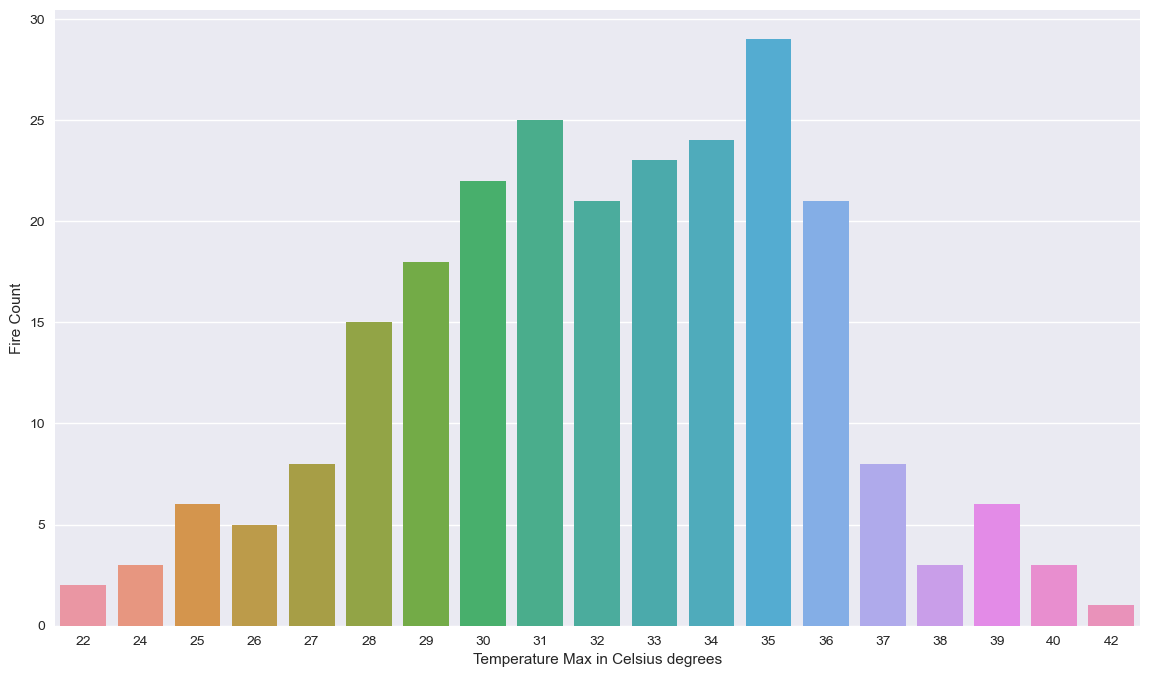

In [81]:
barchart('Temperature','Temperature Max in Celsius degrees')

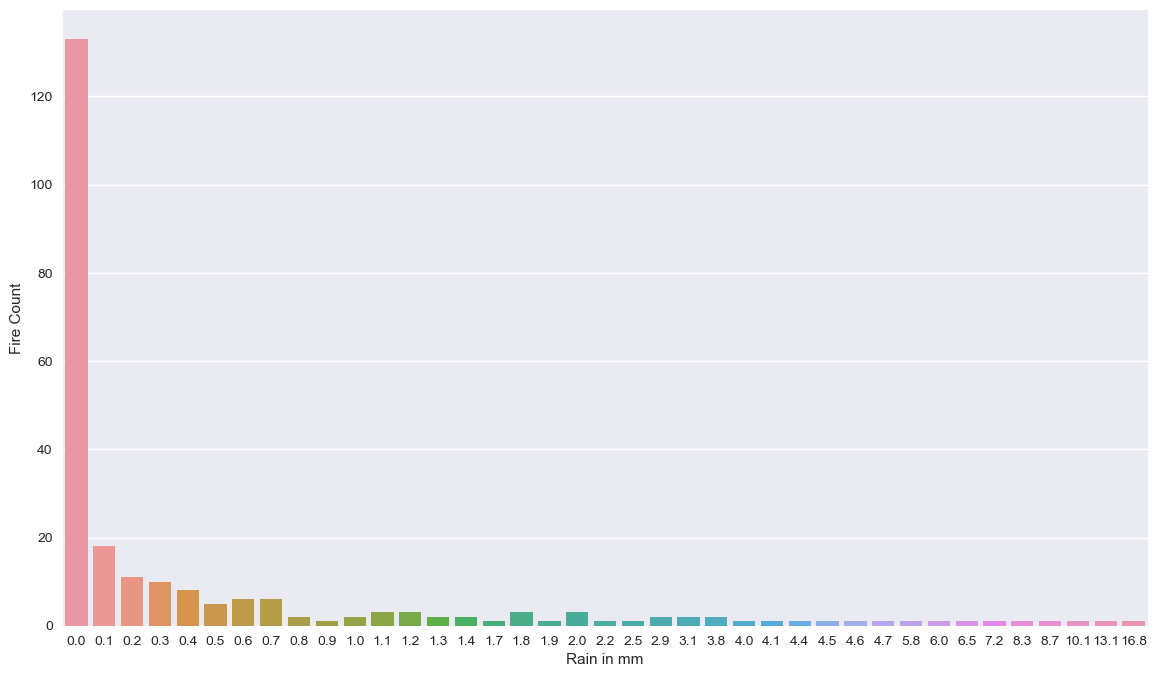

In [82]:
barchart('Rain', 'Rain in mm')

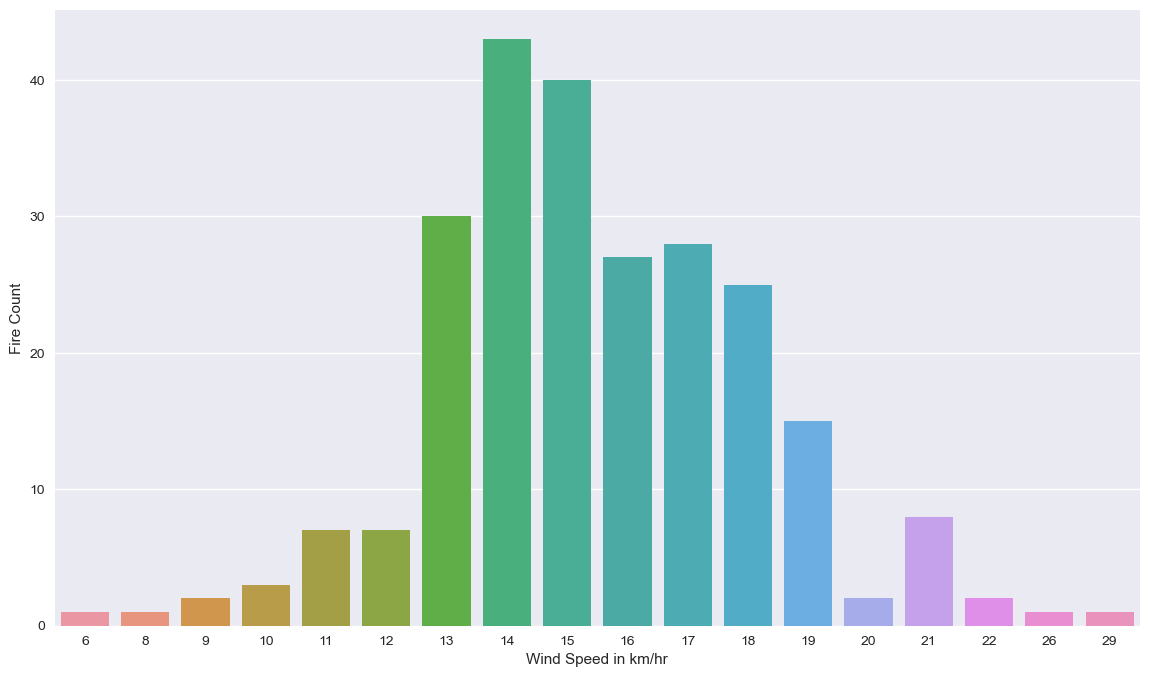

In [83]:
barchart('Ws', 'Wind Speed in km/hr')

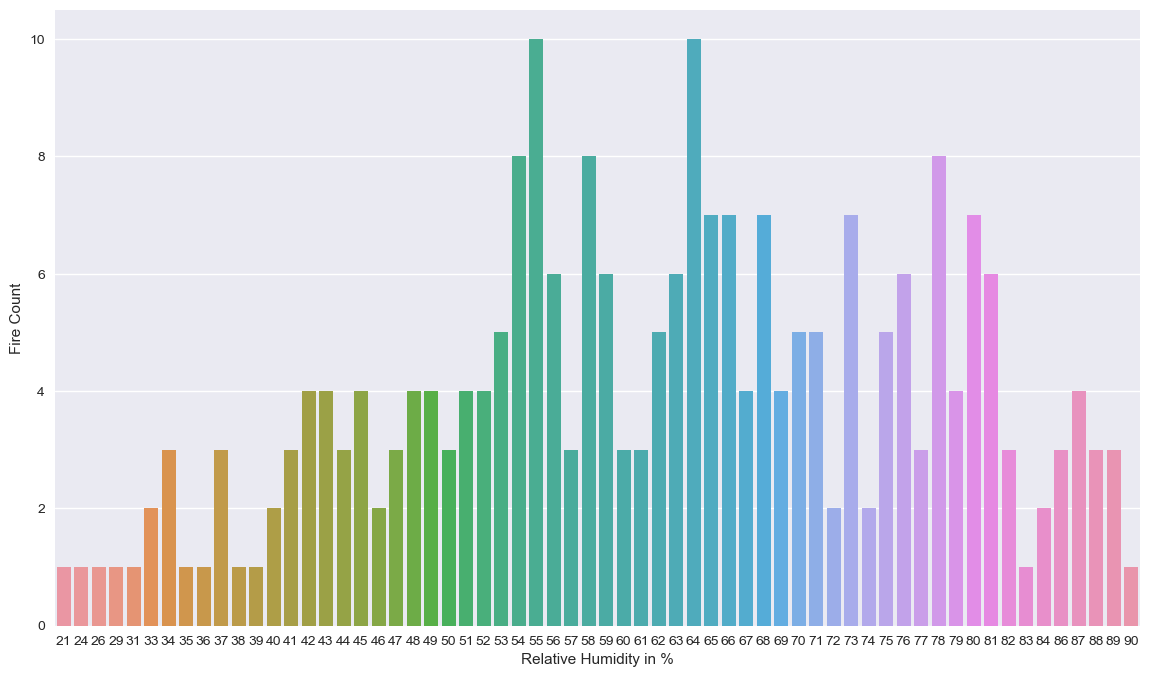

In [84]:
barchart('RH','Relative Humidity in %')

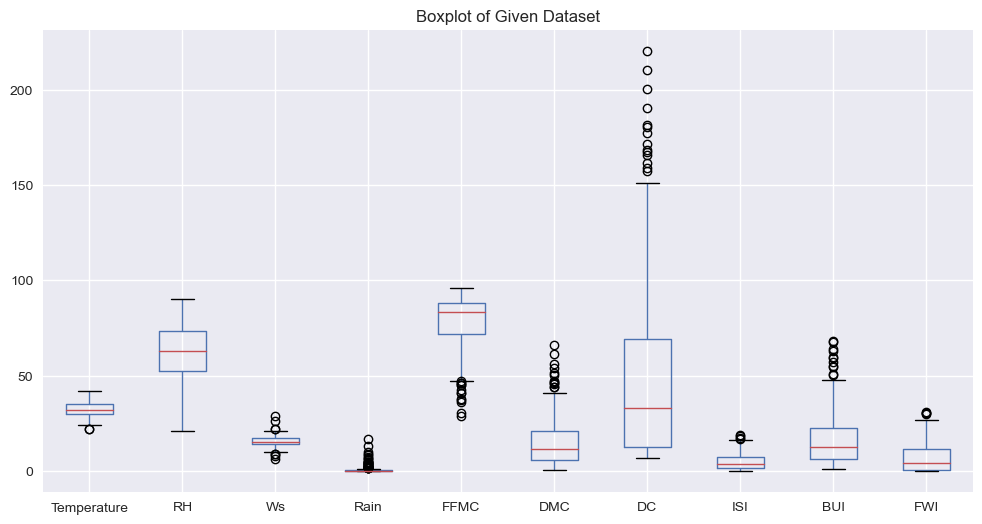

In [85]:
dftemp = df1.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize =(12, 6))
ax = dftemp.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

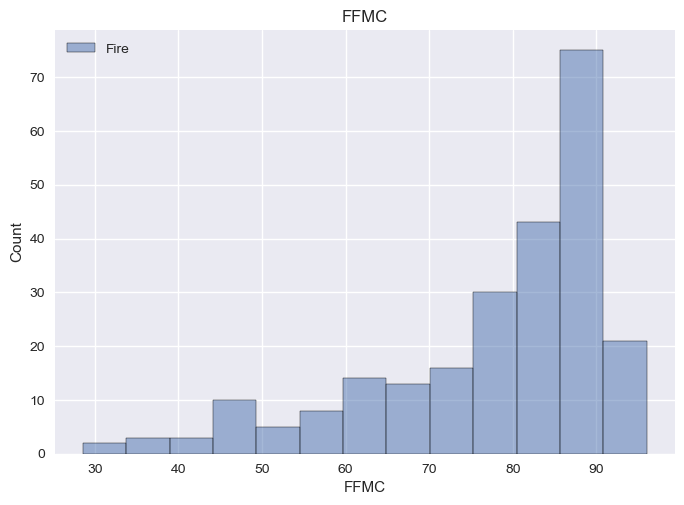

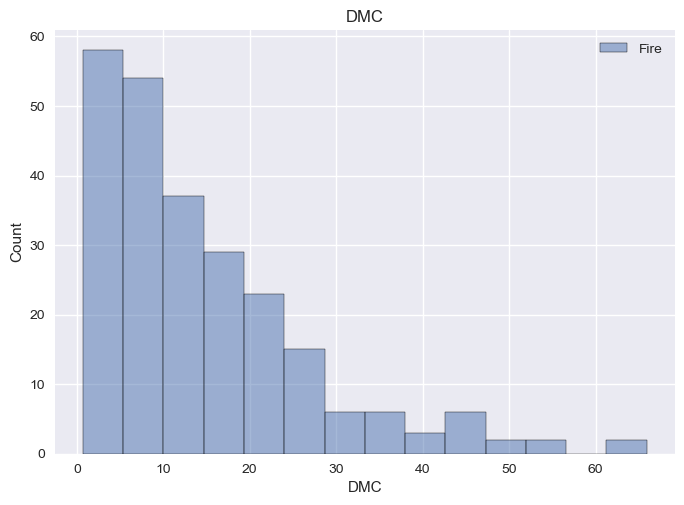

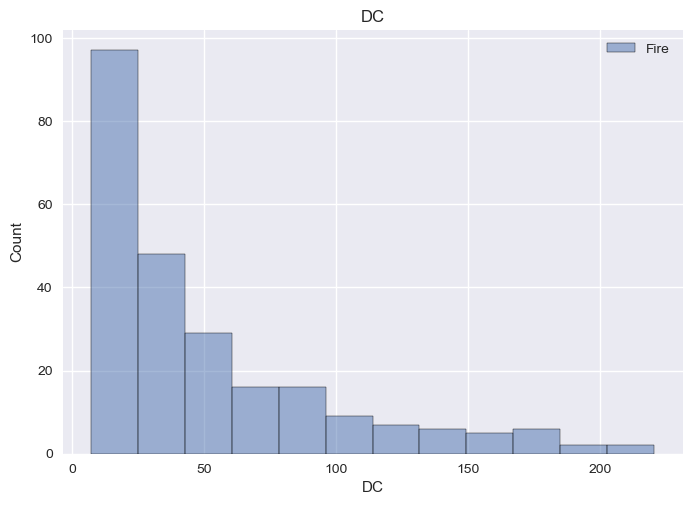

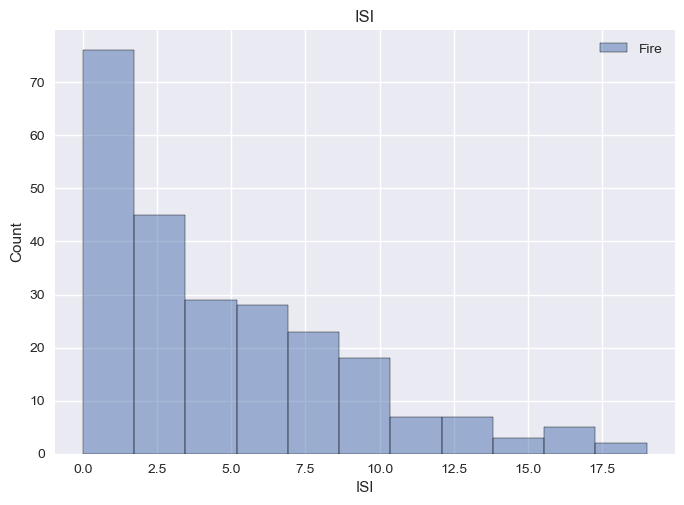

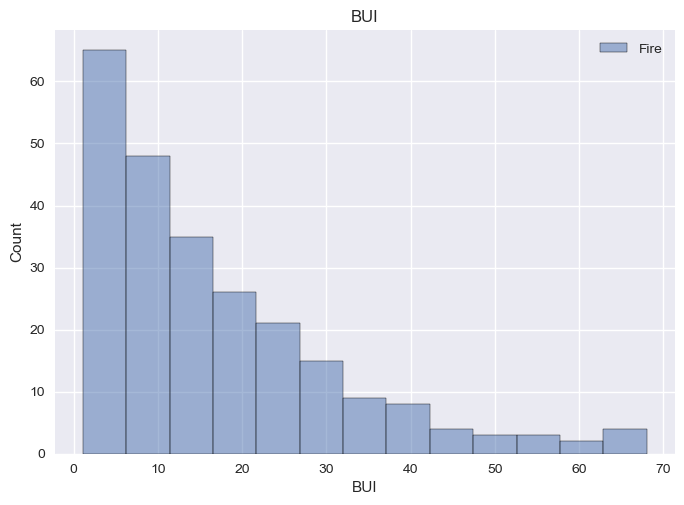

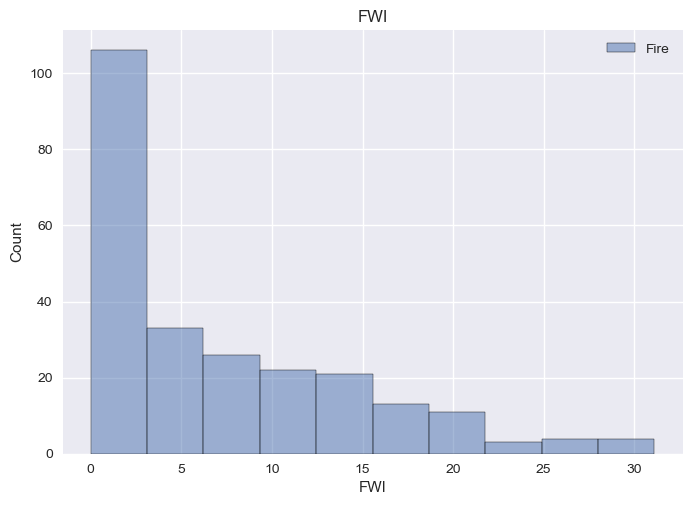

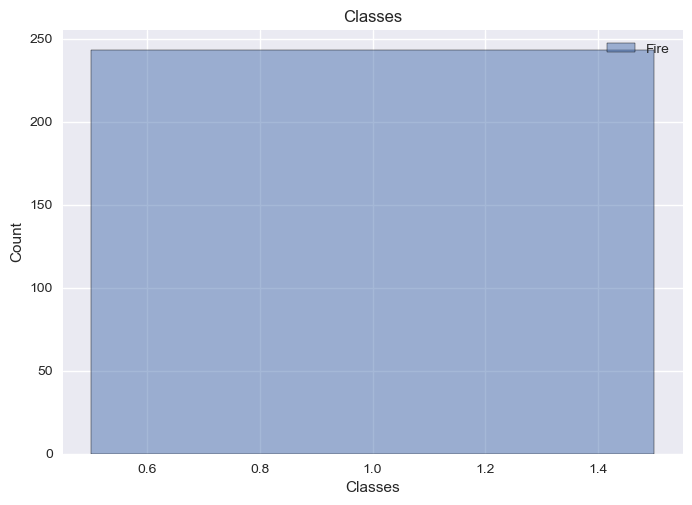

In [86]:
dftemp = dftemp = df1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

REPORT :
    
Weather System Report:-

-Temperature Highest Fire counts happened between 30-37 degree Celsius.

-Rain Highest Fire counts happened when there was no rain to very less rain ie. 0.0 to 0.3.

-Wind Speed highest Fire count happened when the wind speed were between 13 to 19 Km/hr.

-Relative Humidity highest fire count happened when the RH is between 50 to 80%.


FWI System Components Report:-
FWI (Canadian Forest Fire Weather Index)

-Fine Fuel Moisture Code (FFMC) index which ranges between 28.6 to 92.5, here above 75 has higher chance of Forest fires.

-Duff Moisture Code (DMC) index which ranges between 1.1 to 65.9, here 1.1-10 has lower chance of Forest fires whereas above 10-30 DMC has very high evidence of Forest fires in past.

-Drought Code (DC) index which ranges between 7 to 220.4, here 0-25 is safe and has lower chance of Forest fires whereas range above 25 DC has higher chance of forest fires.

-Initial Spread Index (ISI) index which ranges between 0 to 18, here 0-3 has lower Forest fires and above 3 ISI has higher chance of Forest fires.

-Buildup Index (BUI) index which ranges between 1.1 to 68, here 1.1 to 10 has lower Forest fire chance and above 10 BUI has higher chance of forest fires.

-Fire Weather Index (FWI) Index which ranges between 1 to 31.1, here 0-3 has lower chance of Forest fires and 3-25 FWI has higher chance of forest fires.
